# Introduction
music21 is a powerful musicological tool. It can do all sorts of wonderful things such as





## Search for a theme

<music21.metadata.bundles.MetadataBundle {412 entries}>


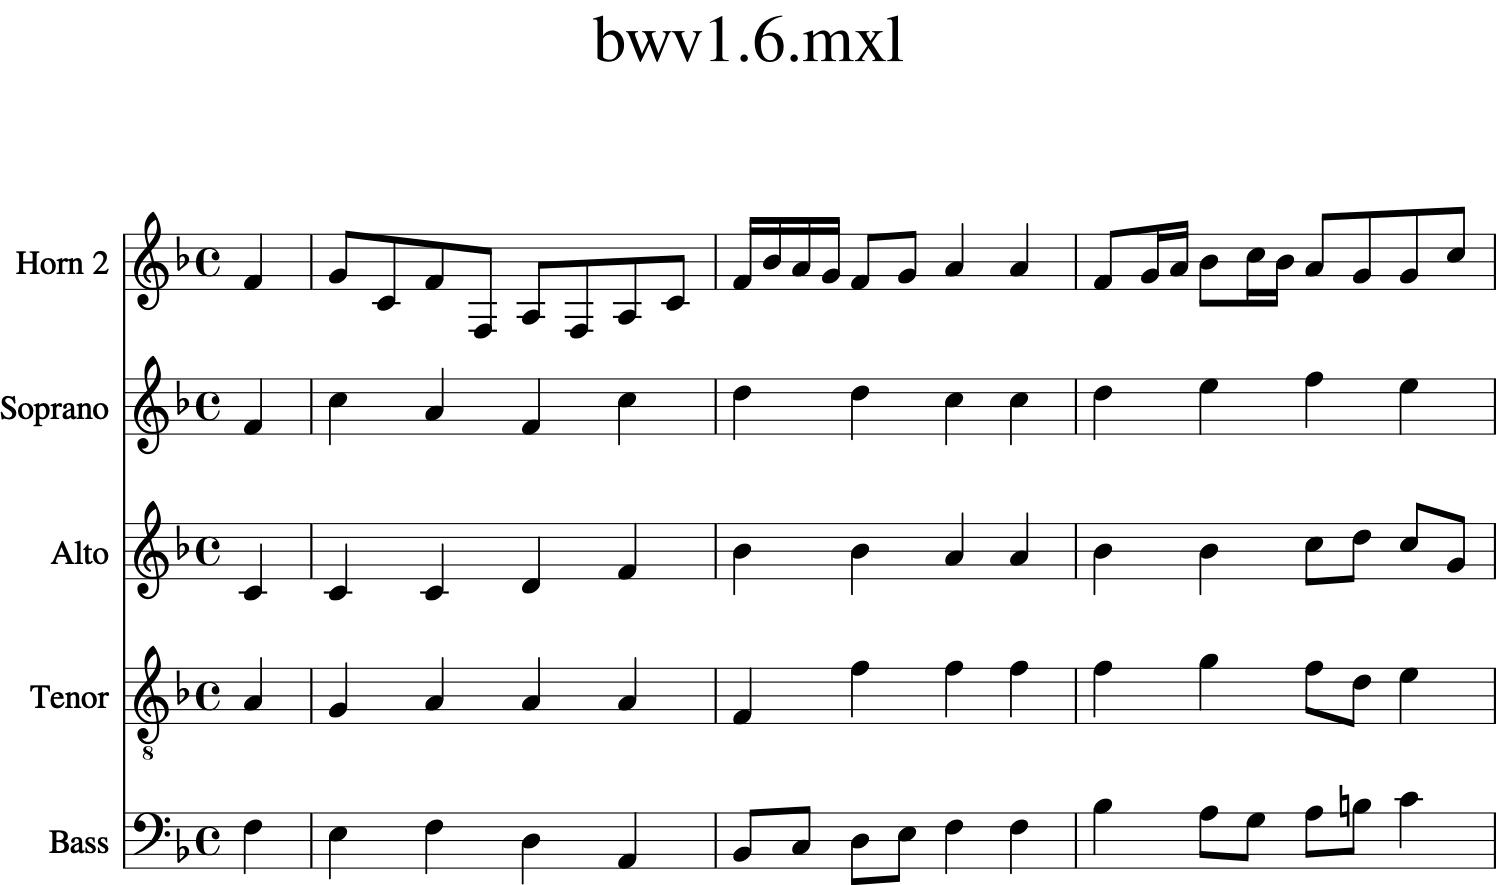

In [5]:
from music21 import *

## Select all Bach Chorales
chorales = corpus.search('bach', fileExtensions='xml')
print(chorales)
bwv1 = chorales[0].parse() # select one as an example
bwv1.measures(0, 3).show()



In [24]:
# define a theme to search. This is without a rhythm first.
searchList = [note.Note('C'), note.Note('D'), note.Note('E'), note.Note('F')]
s = bwv1.recurse().notes                 # prepares the piece for the search
p = search.noteNameSearch(s, searchList) # executes the search

# show were the exact matches were
for notePosition in p:
    startingNote = s[notePosition]
    startingMeasure = startingNote.measureNumber
    startingBeat = startingNote.beat
    startingPart = startingNote.getContextByClass('Part')
    print(startingNote, startingMeasure, startingBeat, startingPart)

<music21.note.Note C> 2 4.0 <music21.stream.Part Soprano>
<music21.note.Note C> 8 4.0 <music21.stream.Part Soprano>
<music21.note.Note C> 2 1.5 <music21.stream.Part Bass>
<music21.note.Note C> 5 2.0 <music21.stream.Part Bass>
<music21.note.Note C> 8 1.5 <music21.stream.Part Bass>
<music21.note.Note C> 11 2.0 <music21.stream.Part Bass>


In [8]:
# Vom Himmel hoch, da komm ich her ("From Heaven Above to Earth I Come") 
# supposedly composed by Luther in 1539
searchStream2 = stream.Stream([key.KeySignature(1),
                               note.Note('G4', type='quarter'),
                               note.Note('F#4', type='quarter'),
                               note.Note('E4', type='quarter'),
                               note.Note('F#4', type='quarter'),
                               note.Note('D4', type='quarter'),
                               note.Note('E4', type='quarter'),
                               note.Note('F#4', type='quarter'),
                               note.Note('G4', type='quarter')])

target1=[]
target2=[]
for i in range(len(chorales)):
    tmp = chorales[i].parse()
    s = tmp.recurse().notes
    for unused in range(12): # unison to seventh
        s2=searchStream2.transpose(unused)
        entryPoints = search.noteNameRhythmicSearch(s, s2.notes)
        len1=len(entryPoints)
        target1.append(len1)
    len2=sum(target1)
    target2.append(len2)
    #print(i,target2[i])
    target1=[]
    print("Done! (that took a while)")

These works contain the theme: [128, 141, 142]


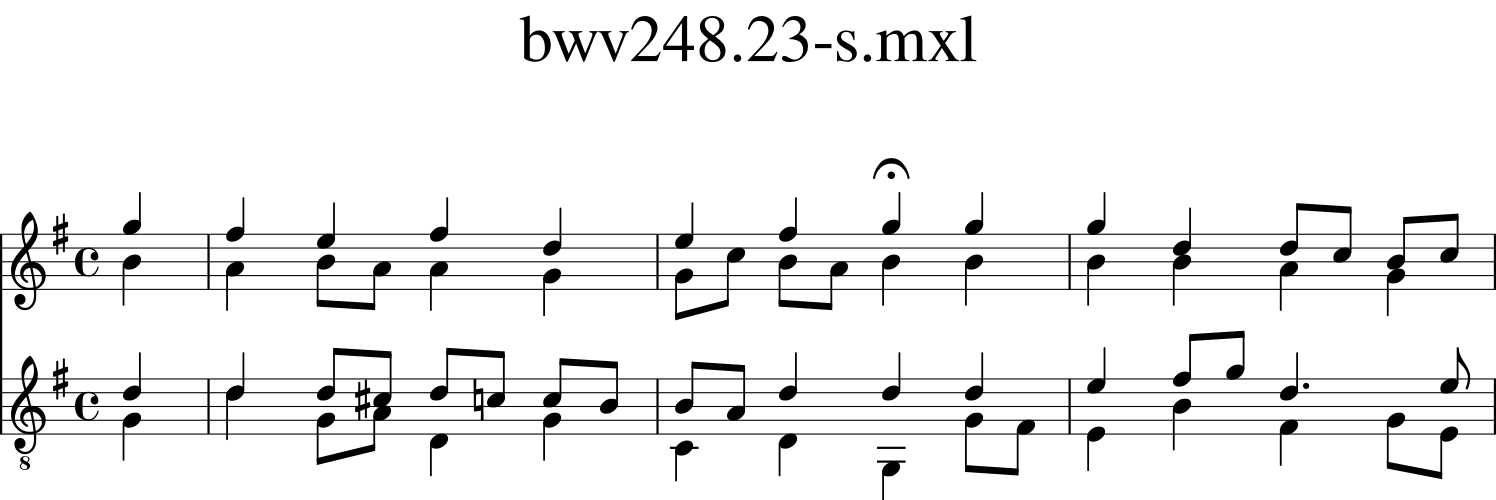

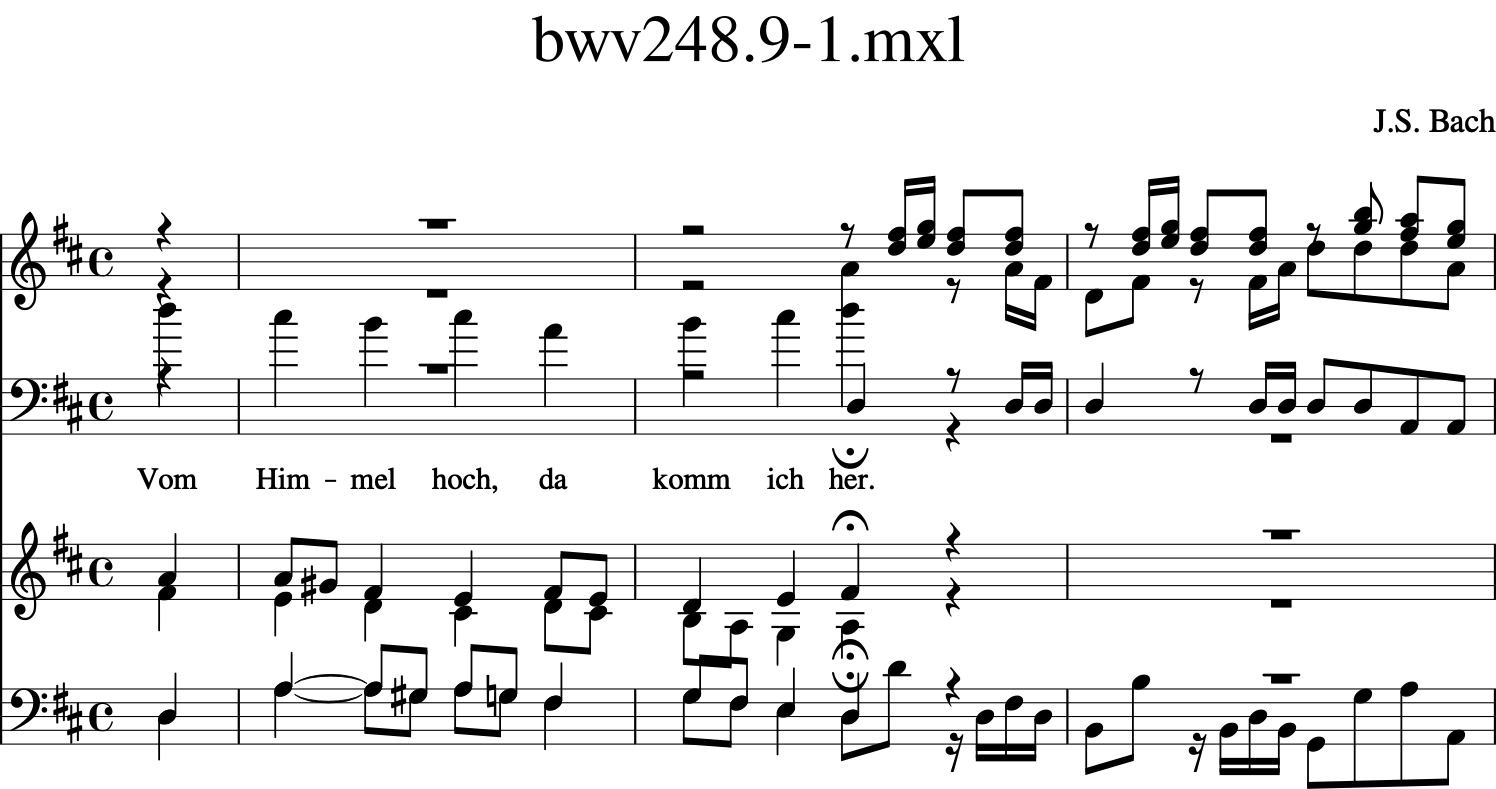

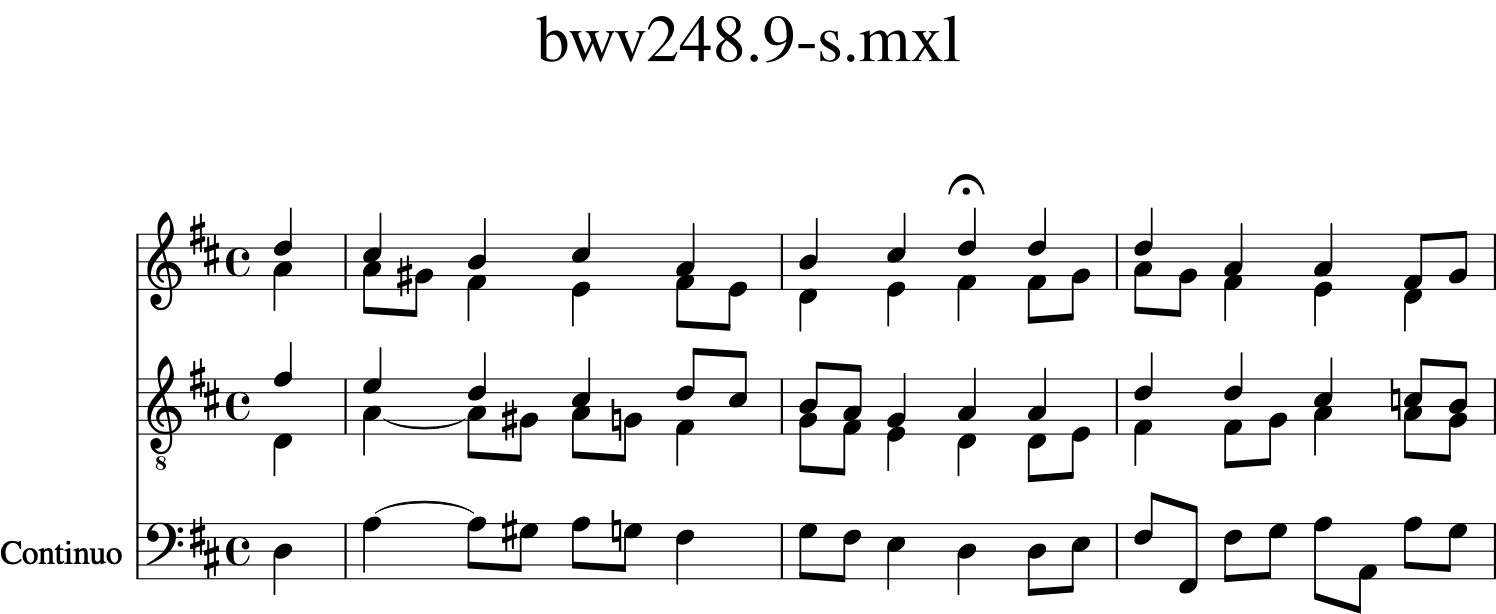

In [13]:
# Display results
hits=[i for i, x in enumerate(target2) if x]
print("These works contain the theme:",hits)

catalog = stream.Opus()

for i in range(0,len(hits)):
    tmp=chorales[hits[i]].parse()
    incipit = tmp.measures(0,3)
    catalog.insert(0, incipit.implode())
catalog.show() # Display the works that contain the theme


In [19]:
# Is that theme used elsewhere?
#trecento = corpus.search('trecento')
#print(trecento)

palestrina = corpus.search('palestrina')
print(palestrina)

# let's allow some rhythmic variations and remove durations
searchStream3 = stream.Stream([key.KeySignature(1),
                               note.Note('G4'),
                               note.Note('F#4'),
                               note.Note('E4'),
                               note.Note('F#4'),
                               note.Note('D4'),
                               note.Note('E4'),
                               note.Note('F#4'),
                               note.Note('G4')])

target1=[]
target2=[]
for i in range(100):
    tmp = palestrina[i].parse()
    s = tmp.recurse().notes
    for unused in range(12): # unison to seventh
        s2=searchStream3.transpose(unused)
        entryPoints = search.noteNameSearch(s, s2.notes)
        len1=len(entryPoints)
        target1.append(len1)
    len2=sum(target1)
    target2.append(len2)
    print(i,target2[i])
    target1=[]
print("Done! (that took a while)")
hits=[i for i, x in enumerate(target2) if x]
print("These works contain the theme:",hits)


<music21.metadata.bundles.MetadataBundle {1318 entries}>
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 1
11 0
12 1
13 0
14 0
15 0
16 0
17 1
18 1
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 2
27 1
28 0
29 0
30 0
31 0
32 0
33 2
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 1
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 1
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 1
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 1
137 1
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 0
156 0
157 1
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 0
172 0
173 0
174 0
175

In [34]:
tmp=palestrina[hits[0]].parse()
s = tmp.recurse().notes                 # prepares the piece for the search
p = search.noteNameSearch(s, searchStream3) # executes the search
target1=[]
target2=[]
for unused in range(12): # unison to seventh
    s2=searchStream2.transpose(unused)
    entryPoints = search.noteNameRhythmicSearch(s, s2.notes)
    len1=len(entryPoints)
    target1.append(len1)
print(target1)
#tmp.show()

# show were the exact matches were
for notePosition in p:
    startingNote = s[notePosition]
    startingMeasure = startingNote.measureNumber
    startingBeat = startingNote.beat
    startingPart = startingNote.getContextByClass('Part')
    print(startingNote, startingMeasure, startingBeat, startingPart)



[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Compare rhythms

Ani Patel and Daniele Steele




## Compare vocal ranges
Has vocal range tended to be the same for SATB over the centuries? 
Of course we do not always know what pitch was the the score mapped onto but at least an analysis of the vocal ranges in soprano, alto, tenor and bass might be informative.


In [ ]:
# Start with Bach chorales
chorales = corpus.search('bach', fileExtensions='xml')

chorales_4parts = coreBundle.search(4, field='numberOfParts') # does not work yet


## Take one example
s = chorales[0].parse()
s.measures(0, 3).show()
for el in s.recurse().parts:
    print(el.offset, el, el.analyze('range').semitones)

# aggregate

## Visualise

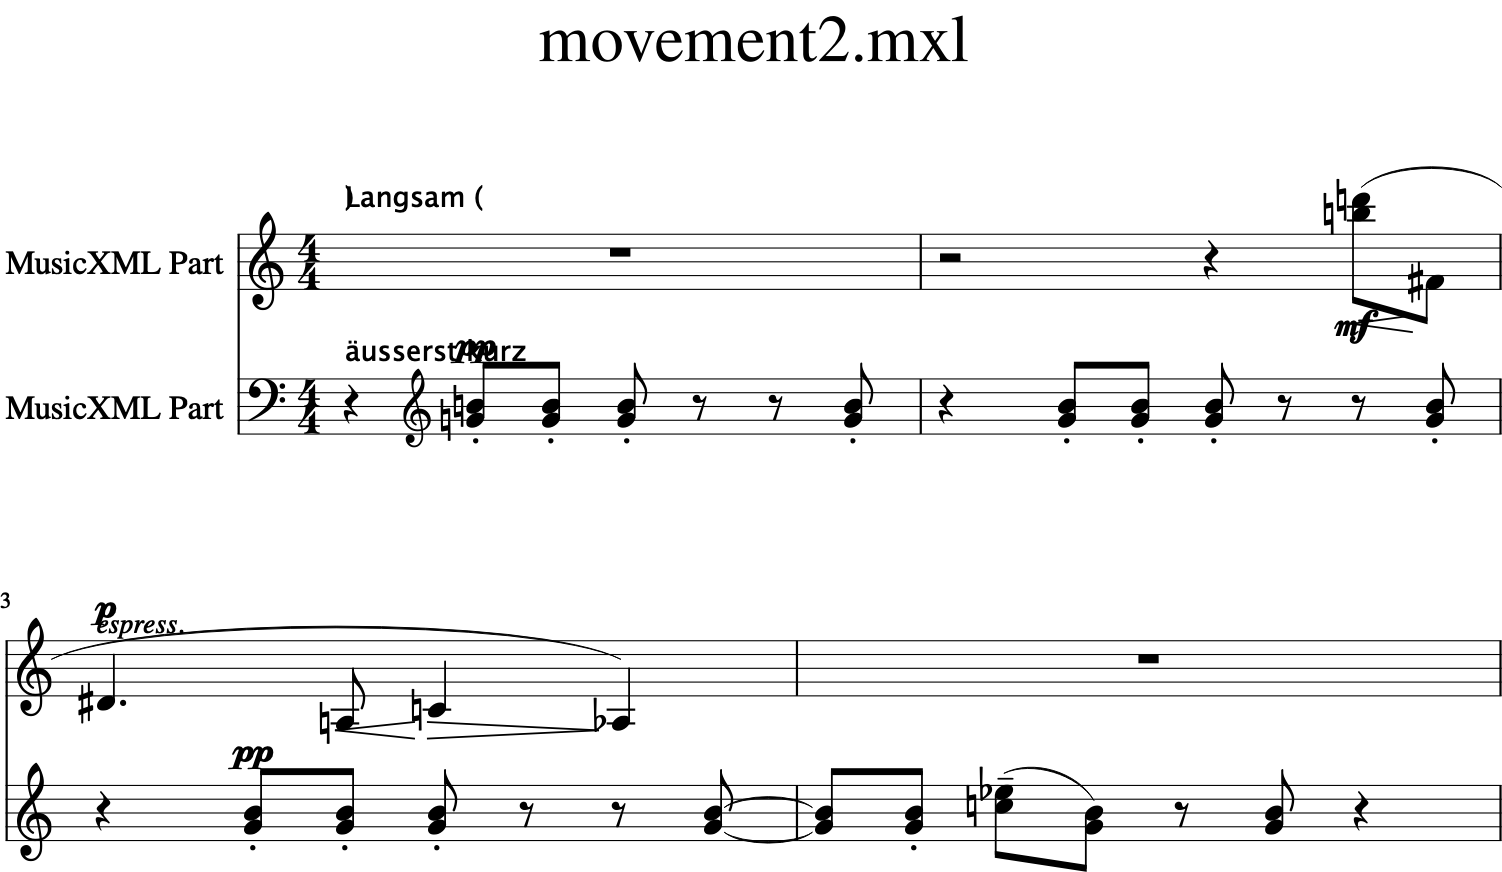

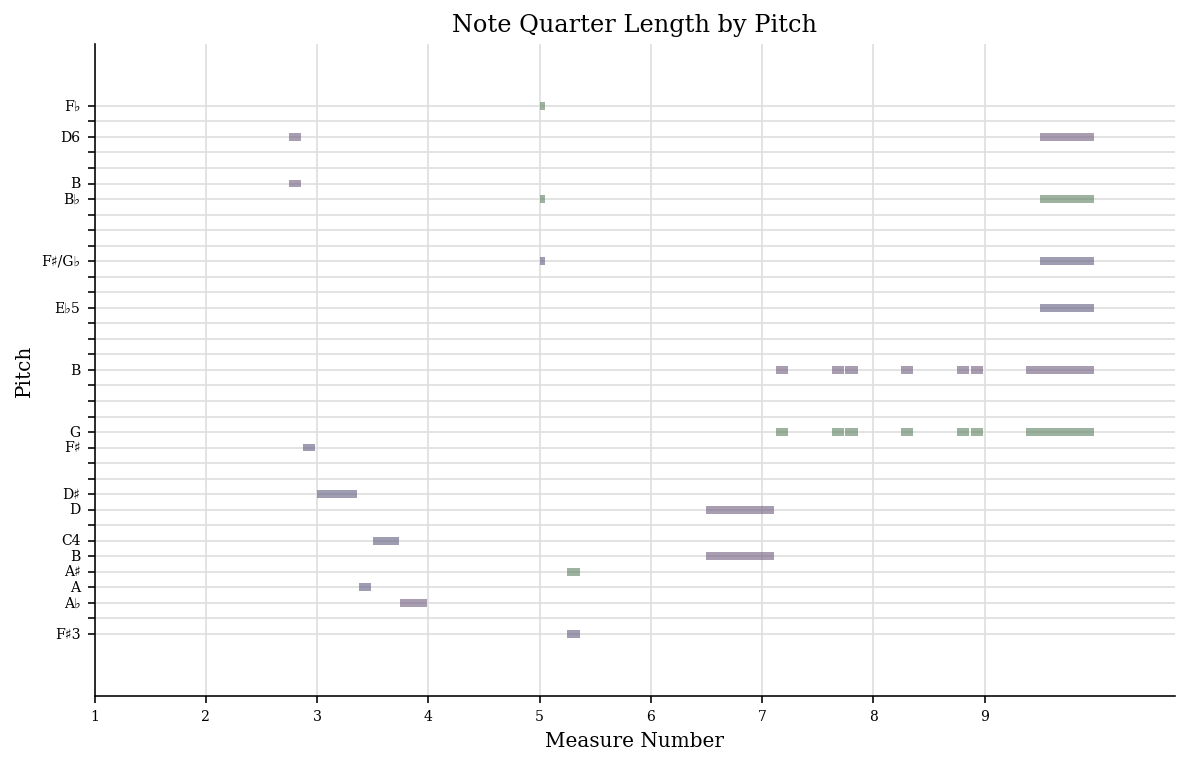

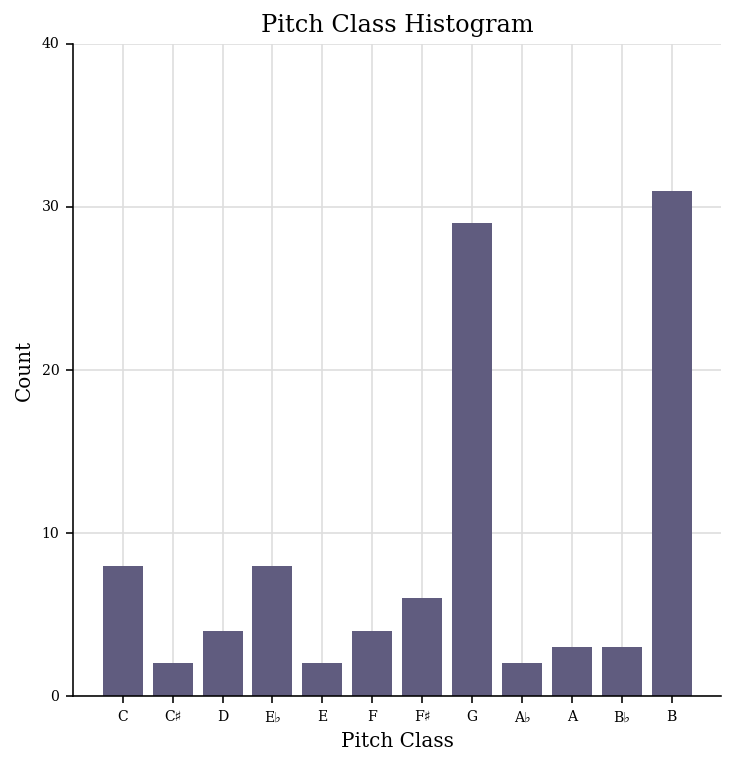

In [36]:
from music21 import *
schoenberg = corpus.parse('schoenberg/opus19', 2)
schoenberg.measures(1, 4).show() # Show first 4 bars

voice = schoenberg.parts[0] # take the Soprano (0=first part)
voice.measures(1, 10).plot() # Piano roll

schoenberg.plot('histogram', 'pitchClass') # plot the distribution of pitch-classes
